In [20]:
#import libraries
import itertools
from prophet import Prophet
import pandas as pd
import numpy as np

from prophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
#get the data
df = pd.read_csv('C:/Users/thieu/Downloads/Data-Gold.csv',parse_dates=True, index_col=0)
df.head(5)

,VND
Date,
2012-01-02,32202288.50
2012-01-03,33607538.00
2012-01-04,33923003.00
2012-01-05,33628569.00
2012-01-06,34000652.75


In [4]:
from sklearn.model_selection import train_test_split 
 
# Splitting the dataset into 80% training data and 20% testing data.
train, test = train_test_split(df, test_size=.20, random_state=0,shuffle=False)

In [5]:
train = train.reset_index(level=0)
train.columns = ['ds','y']
train.head(5)

,ds,y
0,2012-01-02,32202288.50
1,2012-01-03,33607538.00
2,2012-01-04,33923003.00
3,2012-01-05,33628569.00
4,2012-01-06,34000652.75


In [6]:
test = test.reset_index(level=0)
test.columns = ['ds','y']
test.tail(5)

,ds,y
569,2022-12-26,41586906.0
570,2022-12-27,41894838.0
571,2022-12-28,41727084.0
572,2022-12-29,41961480.0
573,2022-12-30,42138426.0


In [7]:
df = pd.concat([train, test],    # Combine vertically
                          ignore_index = True,
                          sort = False)
df.head(5)   

,ds,y
0,2012-01-02,32202288.50
1,2012-01-03,33607538.00
2,2012-01-04,33923003.00
3,2012-01-05,33628569.00
4,2012-01-06,34000652.75


<AxesSubplot:xlabel='ds'>

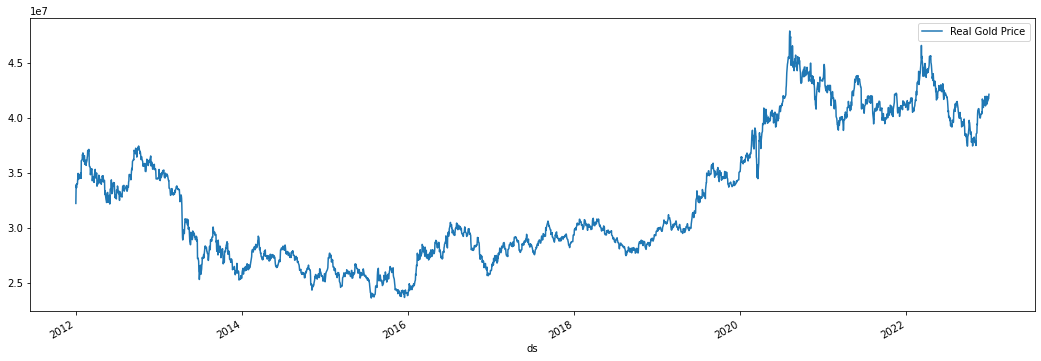

In [8]:
df.plot(x="ds", y='y',figsize=(18,6), label="Real Gold Price")

In [9]:
interrupt = len(train)
interrupt

2296

In [10]:
# Check size
print(train.shape)  
print(test.shape)  

(2296, 2)
(574, 2)


In [11]:
future = test.copy()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


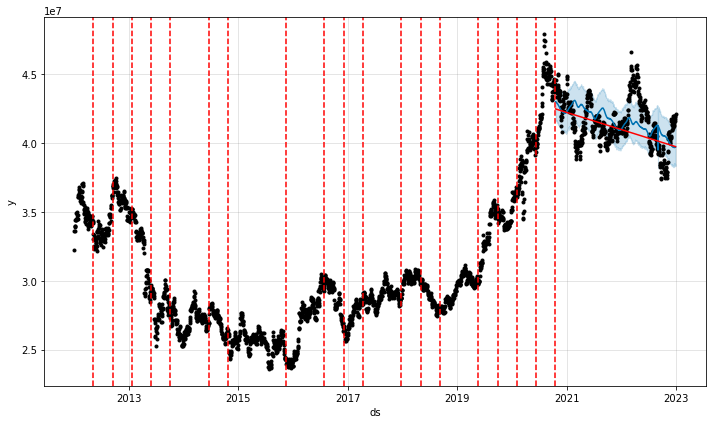

In [12]:
m = Prophet(changepoint_prior_scale=0.099)
predict = m.fit(df).predict(future)
fig = m.plot(predict)
a = add_changepoints_to_plot(fig.gca(), m, predict)

<AxesSubplot:xlabel='ds'>

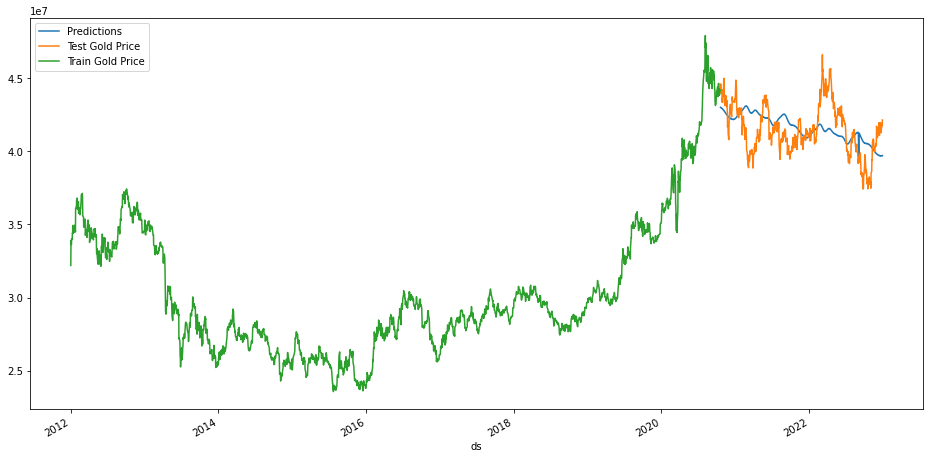

In [13]:
ax = predict.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(16,8))
test.plot(x='ds',y='y',label='Test Gold Price',legend=True,ax=ax)
train.plot(x='ds',y='y',label='Train Gold Price',legend=True,ax=ax)


In [14]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3230,2023-12-26
3231,2023-12-27
3232,2023-12-28
3233,2023-12-29
3234,2023-12-30


In [15]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3230,2023-12-26,3.844256e+07,3.157953e+07,4.484727e+07
3231,2023-12-27,3.843644e+07,3.151329e+07,4.466044e+07
3232,2023-12-28,3.845308e+07,3.123202e+07,4.515786e+07
3233,2023-12-29,3.845221e+07,3.105488e+07,4.443853e+07
3234,2023-12-30,3.634457e+07,2.931910e+07,4.294651e+07


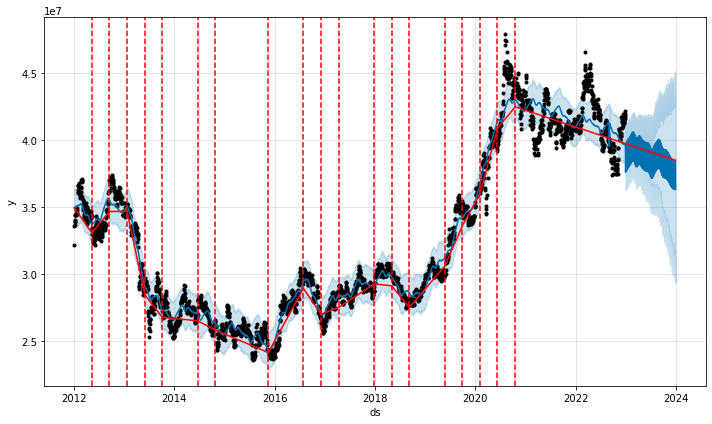

In [16]:
# Pythons
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)

<AxesSubplot:xlabel='ds'>

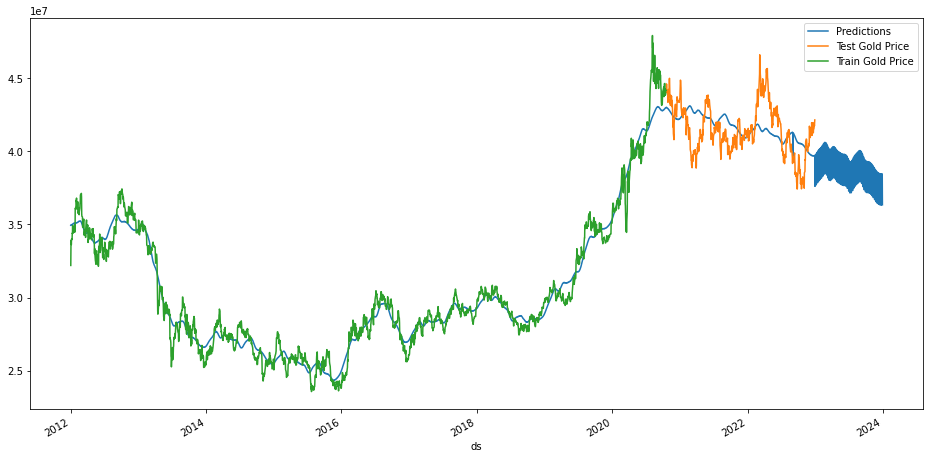

In [17]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(16,8))
test.plot(x='ds',y='y',label='Test Gold Price',legend=True,ax=ax)
train.plot(x='ds',y='y',label='Train Gold Price',legend=True,ax=ax)


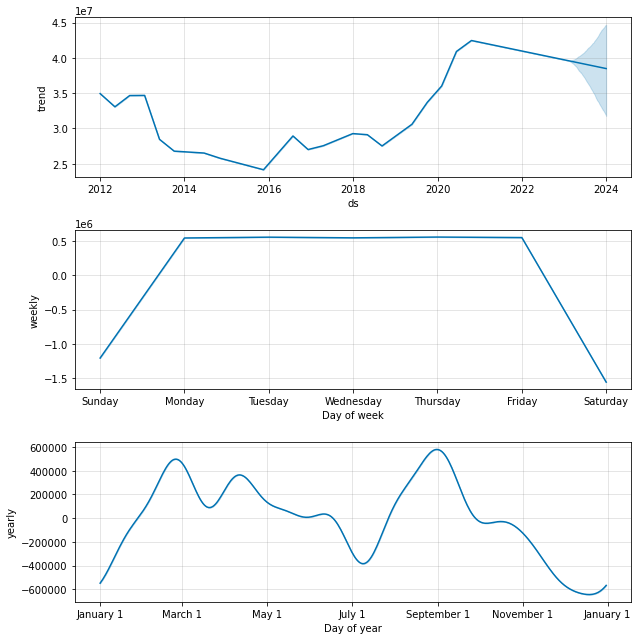

In [18]:
# Python
fig2 = m.plot_components(forecast)

In [19]:
mae = mean_absolute_error(test.y, predict[:interrupt].yhat)
mape = mean_absolute_percentage_error(test.y, predict[:interrupt].yhat)
mse = mean_squared_error(test.y, predict[:interrupt].yhat)
rmse = np.sqrt(mse)

# print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape*100:.2f}%")
# print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MAPE: 3.28%
RMSE: 1664335.79
